In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/User/Desktop/Bachelorarbeit_PL/LocalRepository_away_PL/OLSAI/Datasets/cacao.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,ant_exclusion,stem_diameter,height,canopy,dw_healthy,dw_infect,dw_total,fw_pulb,fw_seeds,fw_total,ab_fl_op,ab_fl_cl,ab_fl
0,0,22.1500,247.50,0.473333,1222,159,1382,13788,5314,19103,2018,5602,7720
1,1,23.9500,223.75,0.603333,1850,216,2076,20222,8417,28639,1257,3648,4894
2,0,23.2500,266.50,0.556667,1058,58,1117,9121,3044,12105,1523,3970,5484
3,1,21.8500,234.25,0.298333,635,52,688,9236,3739,12975,1312,3484,4795
4,0,26.4875,285.25,0.483333,1145,72,1218,13417,3911,17328,2620,5792,8409


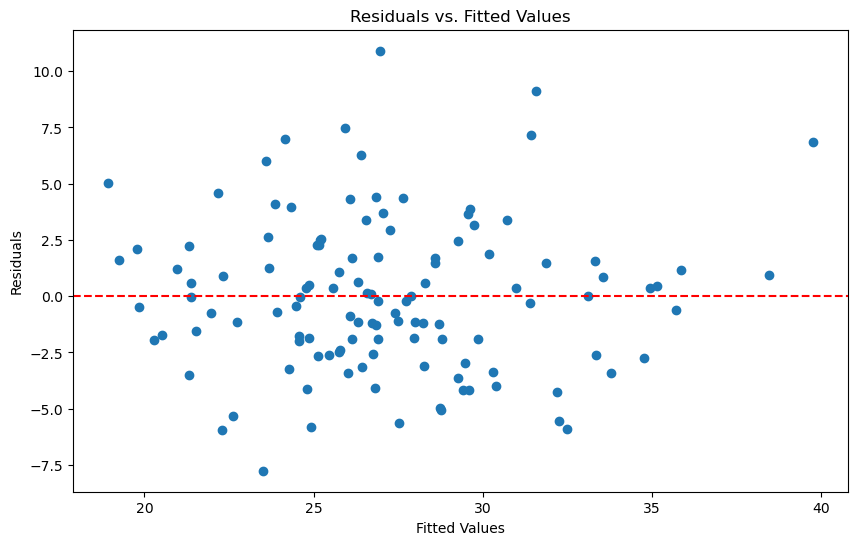

<Figure size 1000x600 with 0 Axes>

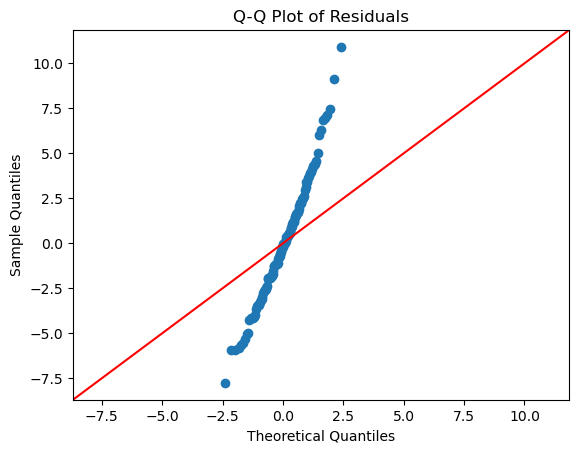

(         Variable           VIF
 0           const    127.242533
 1   ant_exclusion      1.134577
 2          height      1.358716
 3          canopy      1.333076
 4      dw_healthy   5902.424789
 5       dw_infect    224.639794
 6        dw_total   7094.614744
 7         fw_pulb   5845.522981
 8        fw_seeds    662.169136
 9        fw_total  10295.268016
 10       ab_fl_op    242.999623
 11       ab_fl_cl   1175.457840
 12          ab_fl   2344.455046,
 1.4407171708561604,
 ShapiroResult(statistic=0.9848445057868958, pvalue=0.1989554911851883),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          stem_diameter   R-squared:                       0.588
 Model:                            OLS   Adj. R-squared:                  0.542
 Method:                 Least Squares   F-statistic:                     12.71
 Date:                Mon, 08 Jul 2024   Prob (F-statistic):           9.

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the dependent and independent variables
X = data.drop(columns='stem_diameter')
y = data['stem_diameter']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()

# Get the fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

# Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
vif, dw_stat, shapiro_test, model_summary
